<a href="https://colab.research.google.com/github/SebasBalcero/Taller-Analisis-Reddit/blob/main/Taller_WEB_SCRAPING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TALLER DE WEB SCRAPING 
## BIG DATA
  > SEBASTIAN BALCERO MUÑETON
  
  > SAMUEL MADRIGAL CASTAÑO

  UNIVERSIDAD CATÓLICA LUIS AMIGÓ
  
  2023

Para el taller hemos decidido utilizar la red social **'Reddit'** y escoger dos publicaciones del ***subreddit* de Colombia**; una que habla sobre cual es el mejor lugar para vivir, trabajar, etc y la otra cual es el mejor lugar para ir a vacacionar. Lo hacemos desde una red social y no desde una pagina de viajes para ver una opinion, digamos, más real, sin censura. Lo que queremos ver es cuáles ciudades son mas mencionadas, y si alguna está en las dos publicaciones.


In [ ]:
pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import praw #para utilizar el API de Reddit
import pandas as pd #manejo de BD
import numpy as np #manejo de listas
import nltk #Procesamiento de lenguaje natural
import os #sistema operativo
import nltk.corpus

Reddit nos da la posibilidad de crear una API para desarrollos, entonces:

Se crea un API de Reddit la cual nos da los datos necesarios para poder sacar informacion de los posts: 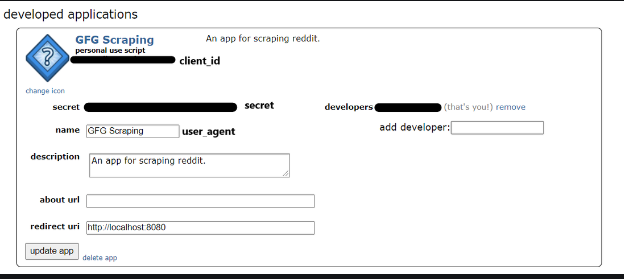

In [ ]:
#Instancia de solo lectura
reddit_read_only = praw.Reddit(client_id="T9Dc01k1SP7NaliLJA5Bow",         # Id cliente
                               client_secret="AflNLoGLAF3NmQZbQy8Hb50yT9_Iyg",      # Id secreto del cliente
                               user_agent="SS Scraping")        #user agent

Se llenan los datos que nos dio la API y se ponen los datos de nuestra cuenta de Reddit


In [ ]:
#Instancia de autorizacion
reddit_authorized = praw.Reddit(client_id="T9Dc01k1SP7NaliLJA5Bow",        # Id cliente
                                client_secret="AflNLoGLAF3NmQZbQy8Hb50yT9_Iyg",       # Id secreto del cliente
                                user_agent="SS Scraping",        #  user agent
                                username="",        # reddit username
                                password="")        # reddit password

### PRIMERA PUBLICACION
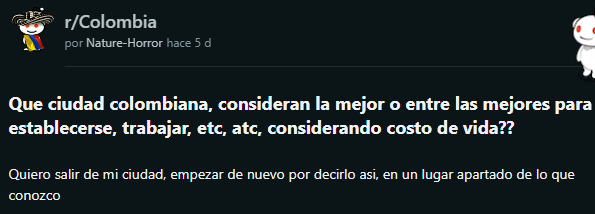

In [ ]:
# URL de la publicacion de reddit
url = "https://www.reddit.com/r/Colombia/comments/12ol5yp/que_ciudad_colombiana_consideran_la_mejor_o_entre/"

In [ ]:
# Creación de un objeto de envío
submission = reddit_read_only.submission(url=url)

Aquí hacemos el proceso para obtener los comentarios de la publicación

In [ ]:
#con el objeto MoreComments extraemos los comentarios de la publicacion
from praw.models import MoreComments 
 
post_comments = [] #se crea una lista vacia para luego almacenar los comentarios
 
for comment in submission.comments: #con este ciclo en caso de que existan mas comentarios hacia abajo tambien los agrega
    if type(comment) == MoreComments:
        continue
 
    post_comments.append(comment.body)#agregamos los comentarios a la lista
 
# creamos un dataframe para mostrar los comentarios que hay en la publicacion
comments_df = pd.DataFrame(post_comments, columns=['comment'])
comments_df

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



,comment
0,Bucaramanchester
1,cali vé \*\*se escuchan tiros de fondo y le ro...
2,"El eje cafetero en general, destacando a Perei..."
3,"De la costa, Barranquilla. No es costosa dado ..."
4,Manizales más que todas.
5,"Pereira, más segura y más barata que muchas"
6,Manizales.
7,Pereira
8,Tunja?
9,"Bogotá, es desordena y estresante como cualqui..."


In [ ]:
text = ''.join(map(str, post_comments))#pasmos la lista a  texto para hacer el proceso de tokenizacion
print(text)

Bucaramanchestercali vé \*\*se escuchan tiros de fondo y le roban la billetera, luego un 2do ladrón le pega un tiro al primero y le roba mi billetera\*\*El eje cafetero en general, destacando a Pereira y Manizales. Además son ciudades más seguras que las principales del país.De la costa, Barranquilla. No es costosa dado a qué está rodeada de Cartagena y Santa Marta, destinos turísticos,Manizales más que todas.Pereira, más segura y más barata que muchasManizales.PereiraTunja?Bogotá, es desordena y estresante como cualquier ciudad grande, pero en ella hay la mejor oferta de educación, trabajo y demás, turística no es, tiene la mayor cantidad de universidades, empresas, industria oferta cultural - entendiéndose como cultura museos, bibliotecas, teatros -
Probablemente la segunda ciudad en ese ámbito sea Medellín.Manizales. La calidad de vida que te ofrece es muy buena o esa es la percepción que tenemos los foráneos (de otras ciudades y pueblos del país).Cualquiera del eje cafeteroNingunaM

Como algunos comentarios tienen links para ir a otra pagina , procedemos a quitarlos, como tambien los numeros y caracteres especiales que no nos sirven en nuestro analisis


In [ ]:
import re

# Patrón para buscar URLs
patron_url = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

# Remplazar URLs con una cadena vacía
text = patron_url.sub('', text)

#Remplazar caracteres especiales y numero
patron_caracteres_especiales = re.compile(r'[^\w\s]|[\d]')

# Remplazar caracteres especiales con una cadena vacía
text = patron_caracteres_especiales.sub('', text)

print(text)

Bucaramanchestercali vé se escuchan tiros de fondo y le roban la billetera luego un do ladrón le pega un tiro al primero y le roba mi billeteraEl eje cafetero en general destacando a Pereira y Manizales Además son ciudades más seguras que las principales del paísDe la costa Barranquilla No es costosa dado a qué está rodeada de Cartagena y Santa Marta destinos turísticosManizales más que todasPereira más segura y más barata que muchasManizalesPereiraTunjaBogotá es desordena y estresante como cualquier ciudad grande pero en ella hay la mejor oferta de educación trabajo y demás turística no es tiene la mayor cantidad de universidades empresas industria oferta cultural  entendiéndose como cultura museos bibliotecas teatros 
Probablemente la segunda ciudad en ese ámbito sea MedellínManizales La calidad de vida que te ofrece es muy buena o esa es la percepción que tenemos los foráneos de otras ciudades y pueblos del paísCualquiera del eje cafeteroNingunaMonteria es excelenteRionegroBarrancab

Hacemos el proceso de tokenización y al mismo tiempo pasando todas las palabras a minúscula.

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize #tokenizar
text=text.lower() #pasar todo a minuscula
token =word_tokenize(text)
token

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['bucaramanchestercali',
 'vé',
 'se',
 'escuchan',
 'tiros',
 'de',
 'fondo',
 'y',
 'le',
 'roban',
 'la',
 'billetera',
 'luego',
 'un',
 'do',
 'ladrón',
 'le',
 'pega',
 'un',
 'tiro',
 'al',
 'primero',
 'y',
 'le',
 'roba',
 'mi',
 'billeterael',
 'eje',
 'cafetero',
 'en',
 'general',
 'destacando',
 'a',
 'pereira',
 'y',
 'manizales',
 'además',
 'son',
 'ciudades',
 'más',
 'seguras',
 'que',
 'las',
 'principales',
 'del',
 'paísde',
 'la',
 'costa',
 'barranquilla',
 'no',
 'es',
 'costosa',
 'dado',
 'a',
 'qué',
 'está',
 'rodeada',
 'de',
 'cartagena',
 'y',
 'santa',
 'marta',
 'destinos',
 'turísticosmanizales',
 'más',
 'que',
 'todaspereira',
 'más',
 'segura',
 'y',
 'más',
 'barata',
 'que',
 'muchasmanizalespereiratunjabogotá',
 'es',
 'desordena',
 'y',
 'estresante',
 'como',
 'cualquier',
 'ciudad',
 'grande',
 'pero',
 'en',
 'ella',
 'hay',
 'la',
 'mejor',
 'oferta',
 'de',
 'educación',
 'trabajo',
 'y',
 'demás',
 'turística',
 'no',
 'es',
 'tiene',
 'la

Como en la nube de palabras queremos ver principalmente los nombres de las ciudades y lo que opina la gente quitamos las siguientes palabras:

In [ ]:
# Definir las palabras a eliminar
palabras_a_eliminar = ["si", "ciudad", "ciudades","tan"]#al hacer el proceso de las stopwords no salieron el "si", ni el "tan"

# Eliminar las palabras a excluir
palabras_filtradas = [palabra for palabra in token if palabra.lower() not in palabras_a_eliminar]


In [ ]:
from nltk.probability import FreqDist #crear un diccinario donde las llaves son las palabras y el valor es el numero de veces que se repite la palabra
fdist = nltk.FreqDist(palabras_filtradas)
fdist

FreqDist({'y': 19, 'de': 17, 'es': 17, 'que': 12, 'la': 10, 'no': 10, 'son': 7, 'más': 6, 'un': 5, 'lo': 5, ...})

In [ ]:
fdist1 = fdist.most_common(15)#me muestra las comunes
fdist1

[('y', 19),
 ('de', 17),
 ('es', 17),
 ('que', 12),
 ('la', 10),
 ('no', 10),
 ('son', 7),
 ('más', 6),
 ('un', 5),
 ('lo', 5),
 ('en', 4),
 ('las', 4),
 ('del', 4),
 ('tiene', 4),
 ('muy', 4)]

Eliminamos las stopwords y se vuleve a mostar el diccionario sin estas:

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

palabras_vacias = set(stopwords.words("spanish"))

text_without_stopwords = [x for x in palabras_filtradas if x not in palabras_vacias]

fdist = nltk.FreqDist(text_without_stopwords)
fdist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FreqDist({'manizales': 3, 'oferta': 3, 'buena': 3, 'clima': 3, 'eje': 2, 'cafetero': 2, 'general': 2, 'pereira': 2, 'mejor': 2, 'trabajo': 2, ...})

Descargamos estos objetos del nltk para hacer el proceso de lematizacion

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Hacemos el proceso de lematización

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
palabras_lematizadas = [] #se crea una lista vacia para almacenar las palabras ya lematizadas
for palabra in text_without_stopwords: #se hace un ciclo para lematizar cada palabra
    palabra_lematizada = lemmatizer.lemmatize(palabra)
    palabras_lematizadas.append(palabra_lematizada)
texto_lematizado = " ".join(palabras_lematizadas)#se pone todo nuevamente en un texto para poder hacer la nube de palabras
print(texto_lematizado)

bucaramanchestercali vé escuchan tiro fondo roban billetera luego do ladrón pega tiro primero roba billeterael eje cafetero general destacando pereira manizales además seguras principales paísde costa barranquilla costosa dado rodeada cartagena santa marta destinos turísticosmanizales todaspereira segura barata muchasmanizalespereiratunjabogotá desordena estresante cualquier grande mejor oferta educación trabajo demás turística mayor cantidad universidades empresas industria oferta cultural entendiéndose cultura museos bibliotecas teatros probablemente segunda ámbito medellínmanizales calidad vida ofrece buena percepción foráneos pueblo paíscualquiera eje cafeteroningunamonteria excelenterionegrobarrancabermejabogotátoda zona caucay extranjero dónde posibilidades encontrar empleo pieza popayan pequeña clima grados fresco cafetero arriendo económico cercahe escuchado excelentes comentarios yopal buen clima seguro trancones inesperadamente buena abundante oferta empleoen personal gustan 

Se crea la nube de palabras para ver principalmente las ciudades que más se mencionan y los comentarios que se hacen 

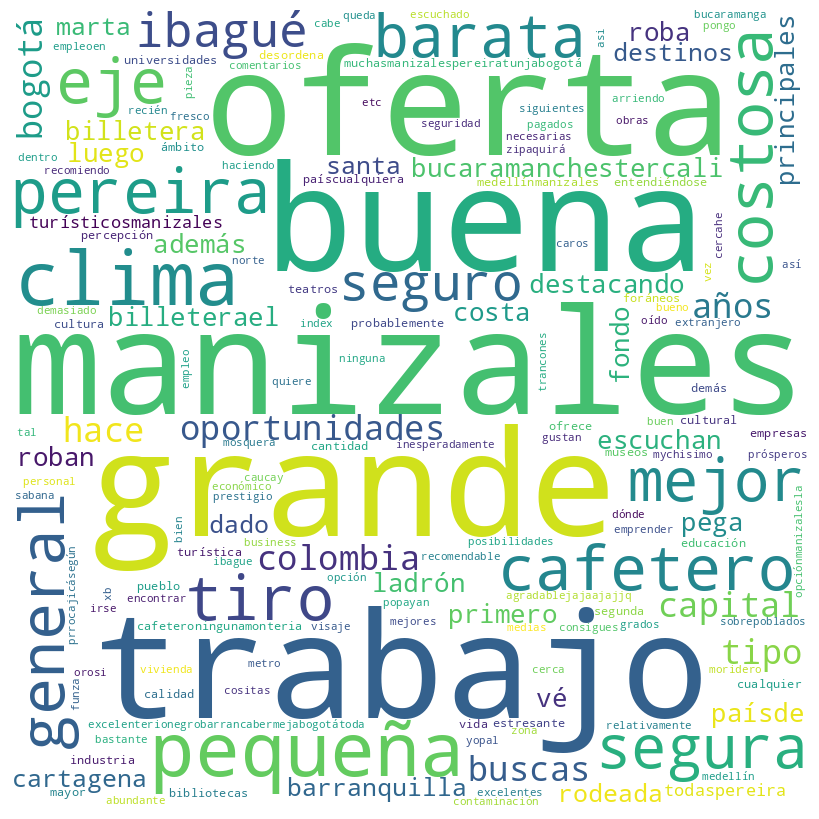

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Crear un objeto WordCloud con el texto
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(texto_lematizado)
#Visualizar la nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## CONCLUSIONES POST NÚMERO UNO





#1.   Las ciudades más mencionadas son Manizales, Bucaramanga, Ibagué, Barranquilla.
#2.   Se habla mucho de temas de violencia e inseguridad.
#3.   Al ser un tema de cambio de vivienda se habla mucho con las palabras "barato" "costoso" "oferta"; todas relacionadas al manejo de dinero






### SEGUNDA PUBLICACION
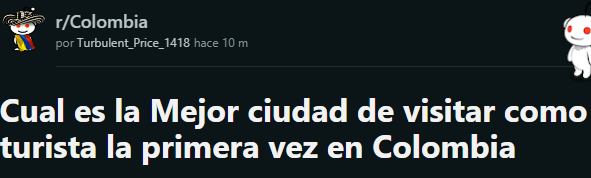

In [ ]:
# URL de la segunda publicacion de reddit
url2 = "https://www.reddit.com/r/Colombia/comments/vat1lw/cual_es_la_mejor_ciudad_de_visitar_como_turista/"

In [ ]:
# Creación de un objeto de envío
submission2 = reddit_read_only.submission(url=url2)

Aquí hacemos el proceso para obtener los comentarios de la publicación

In [ ]:
#con el objeto MoreComments extraemos los comentarios de la publicacion
from praw.models import MoreComments 
 
post2_comments = [] #se crea una lista vacia para luego almacenar los comentarios
 
for comment2 in submission2.comments: #con este ciclo en caso de que existan mas comentarios hacia abajo tambien los agrega
    if type(comment2) == MoreComments:
        continue
 
    post2_comments.append(comment2.body)#agregamos los comentarios a la lista
 
# creamos un dataframe para mostrar los comentarios que hay en la publicacion
comments2_df = pd.DataFrame(post2_comments, columns=['comment'])
comments2_df

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



,comment
0,[deleted]
1,Bucaramanga y los pueblitos de Santander.\nLa ...
2,Entre cartagena y medellin diria yo. Bogota pu...
3,Llegue a Bogota y vallase en carro a bucaraman...
4,[deleted]
5,"Medellín, Manizales o Cartagena, Bogotá es sim..."
6,Medellin
7,Vaya a San Agustín. El camino para ir allá mue...
8,Armenia and visit all the small towns like Sal...
9,Pasto


In [ ]:
texto = ''.join(map(str, post2_comments))#pasamos la lista a texto para hacer el proceso de tokenizacion
print(texto)

[deleted]Bucaramanga y los pueblitos de Santander.
La gastronomía es excelenteEntre cartagena y medellin diria yo. Bogota pues es la capital y hay cosas que vale la pena ver pero puede ser un poco insegura y caotica.Llegue a Bogota y vallase en carro a bucaramanga.   Pare en todos esos piqueteaderos y se da un auténtico tour de gastronomía local[deleted]Medellín, Manizales o Cartagena, Bogotá es simplemente una ciudad grande, peligrosa y caótica, no vale la penaMedellinVaya a San Agustín. El camino para ir allá muestra la diversidad medioambiental del país. Allá encontrará además una de las culturas más primitivas del país, y un paisaje espectacular.Armenia and visit all the small towns like Salento, Filandia and the Coffee ParkPastomadallo o cartegena, y no te pierdas los carnavales de Barranquilla si tienes la opotunidadSi es por gastronomía Bogotá tiene un poco de todas las regiones¿que hay para ver en Medellín para que lo comenten tanto?CaliCreo que depende de lo que te guste a ti.

El caso de esta publicación comparado con el de la anterior es distinto, ya que esta no tiene comentarios que contengan links o enlaces, por lo que omitimos el paso que hicimos en la publicación anterior para deshacernos de esos. Aún así, quitamos caracteres especiales y números:

In [ ]:
import re

#Remplazar caracteres especiales y números
patron2_caracteres_especiales = re.compile(r'[^\w\s]|[\d]')

# Remplazar caracteres especiales con una cadena vacía
texto = patron2_caracteres_especiales.sub('', texto)

print(texto)

deletedBucaramanga y los pueblitos de Santander
La gastronomía es excelenteEntre cartagena y medellin diria yo Bogota pues es la capital y hay cosas que vale la pena ver pero puede ser un poco insegura y caoticaLlegue a Bogota y vallase en carro a bucaramanga   Pare en todos esos piqueteaderos y se da un auténtico tour de gastronomía localdeletedMedellín Manizales o Cartagena Bogotá es simplemente una ciudad grande peligrosa y caótica no vale la penaMedellinVaya a San Agustín El camino para ir allá muestra la diversidad medioambiental del país Allá encontrará además una de las culturas más primitivas del país y un paisaje espectacularArmenia and visit all the small towns like Salento Filandia and the Coffee ParkPastomadallo o cartegena y no te pierdas los carnavales de Barranquilla si tienes la opotunidadSi es por gastronomía Bogotá tiene un poco de todas las regionesque hay para ver en Medellín para que lo comenten tantoCaliCreo que depende de lo que te guste a ti
Música representativ

Hacemos el proceso de tokenizacion y al mismo tiempo pasando todas las palabras a minuscula

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize #tokenizar
texto=texto.lower() #pasar todo a minuscula
token2 =word_tokenize(texto)
token2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['deletedbucaramanga',
 'y',
 'los',
 'pueblitos',
 'de',
 'santander',
 'la',
 'gastronomía',
 'es',
 'excelenteentre',
 'cartagena',
 'y',
 'medellin',
 'diria',
 'yo',
 'bogota',
 'pues',
 'es',
 'la',
 'capital',
 'y',
 'hay',
 'cosas',
 'que',
 'vale',
 'la',
 'pena',
 'ver',
 'pero',
 'puede',
 'ser',
 'un',
 'poco',
 'insegura',
 'y',
 'caoticallegue',
 'a',
 'bogota',
 'y',
 'vallase',
 'en',
 'carro',
 'a',
 'bucaramanga',
 'pare',
 'en',
 'todos',
 'esos',
 'piqueteaderos',
 'y',
 'se',
 'da',
 'un',
 'auténtico',
 'tour',
 'de',
 'gastronomía',
 'localdeletedmedellín',
 'manizales',
 'o',
 'cartagena',
 'bogotá',
 'es',
 'simplemente',
 'una',
 'ciudad',
 'grande',
 'peligrosa',
 'y',
 'caótica',
 'no',
 'vale',
 'la',
 'penamedellinvaya',
 'a',
 'san',
 'agustín',
 'el',
 'camino',
 'para',
 'ir',
 'allá',
 'muestra',
 'la',
 'diversidad',
 'medioambiental',
 'del',
 'país',
 'allá',
 'encontrará',
 'además',
 'una',
 'de',
 'las',
 'culturas',
 'más',
 'primitivas',
 'del'

Como en la nube de palabras queremos ver principalmente los nombres de las ciudades y lo que opina la gente quitamos las siguientes palabras:

In [ ]:
# Definir las palabras a eliminar
palabras_a_eliminar2 = ["deletedbucaramanga", "si"]#al hacer el proceso de las stopwords no salió esta palabra

# Eliminar las palabras a excluir
palabras_filtradas2 = [palabra2 for palabra2 in token2 if palabra2.lower() not in palabras_a_eliminar2]

In [ ]:
from nltk.probability import FreqDist #crear un diccinario donde las llaves son las palabras y el valor es el numero de veces que se repite la palabra
fdist3 = nltk.FreqDist(palabras_filtradas2)
fdist3

FreqDist({'y': 34, 'de': 33, 'es': 23, 'la': 22, 'que': 18, 'a': 15, 'el': 14, 'en': 12, 'pero': 10, 'no': 10, ...})

In [ ]:
fdist2 = fdist3.most_common(15)#me muestra las comunes
fdist2

[('y', 34),
 ('de', 33),
 ('es', 23),
 ('la', 22),
 ('que', 18),
 ('a', 15),
 ('el', 14),
 ('en', 12),
 ('pero', 10),
 ('no', 10),
 ('un', 9),
 ('bogotá', 9),
 ('para', 9),
 ('del', 9),
 ('por', 9)]

Eliminamos las stopwords y se vuleve a mostar el diccionario sin estas

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

palabras_vacias2 = set(stopwords.words("spanish"))

texto_without_stopwords = [x for x in palabras_filtradas2 if x not in palabras_vacias2]

fdist2 = nltk.FreqDist(texto_without_stopwords)
fdist2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FreqDist({'bogotá': 9, 'bogota': 8, 'mejor': 6, 'comida': 6, 'cartagena': 5, 'medellin': 5, 'medellín': 5, 'allá': 4, 'barranquilla': 4, 'restaurantes': 4, ...})

Descargamos estos objetos del nltk para hacer el proceso de lematizacion

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Hacemos el proceso de lematizacion

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer2 = WordNetLemmatizer()
palabras2_lematizadas = [] #se crea una lista vacia para almacenar las palabras ya lematizadas
for palabra2 in texto_without_stopwords: #se hace un ciclo para lematizar cada palabra
    palabra2_lematizada = lemmatizer2.lemmatize(palabra2)
    palabras2_lematizadas.append(palabra2_lematizada)
texto2_lematizado = " ".join(palabras2_lematizadas)#se pone todo nuevamente en un texto para poder hacer la nube de palabras
print(texto2_lematizado)

pueblitos santander gastronomía excelenteentre cartagena medellin diria bogota pues capital cosas vale pena ver puede ser insegura caoticallegue bogota vallase carro bucaramanga pare piqueteaderos da auténtico tour gastronomía localdeletedmedellín manizales cartagena bogotá simplemente ciudad grande peligrosa caótica vale penamedellinvaya san agustín camino ir allá muestra diversidad medioambiental país allá encontrará además culturas primitivas país paisaje espectaculararmenia and visit all the small town like salento filandia and the coffee parkpastomadallo cartegena pierdas carnavales barranquilla opotunidadsi gastronomía bogotá toda regionesque ver medellín comenten tantocalicreo depende guste música representativa cali buen clima muchas montañas medellín clima caluroso playas realmente hermosas cartagena santa marta san andrés islas nombre indica isla cuidad tal clima caluroso gente agradable alegre mencionar carnaval barranquilla quieres saber mucha historia colombia bogotá etc e

Se crea la segunda nube de palabras para ver principalmente las ciudades que mas de mencionan y los comentarios que se hacen sobre estas. En este caso, sobre las ciudades más turísticas.

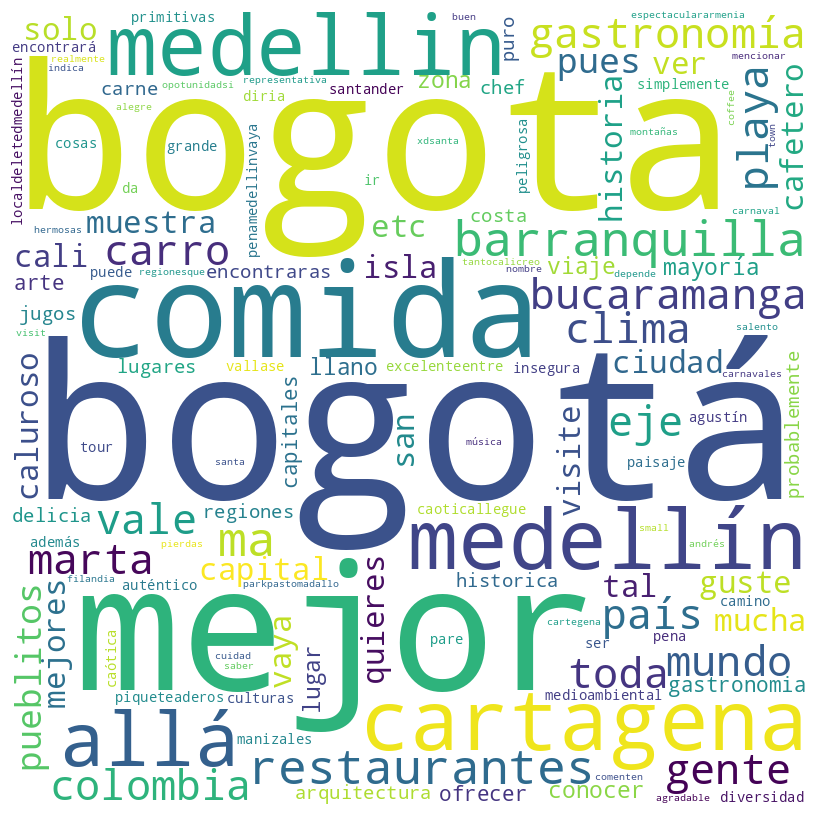

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Crear un objeto WordCloud con el texto
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(texto2_lematizado)
#Visualizar la nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## CONCLUSIONES POST NÚMERO DOS

#1.   Las ciudades más mencionadas son Bogotá, Medellin, Cartagena, Barranquilla.
#2.   Se habla mucho de temas de gastronomía, de arquitectura, y de paisajes.
#3.   Al ser un tema más de turismo se utilizan mucho palabras como "visite, visitar", "arquitectura", "pueblitos", "restaurantes".


##CONCLUSIONES GENERALES

#1. La posibilidad que Reddit ofrece para trabajar con una API de desarrollo proporciona una mayor facilidad para aquellos que deseen utilizar esta red social para estudios.
#2. El proceso de 'Web-Scraping' en una red social tiene sus complejidades debido a que cada red social está estructurada de una forma diferente y las personas se pueden expresar de manera libre, lo cual hace que las palabras sean más dificiles de trabajar.
#3. Al momento de hacer el proceso de 'stopwords' en el idioma español pueden darse varias complicaciones; puede deberse a que los diccionarios no están del todo terminados, o el proceso está más refinado en, por ejemplo, inglés.

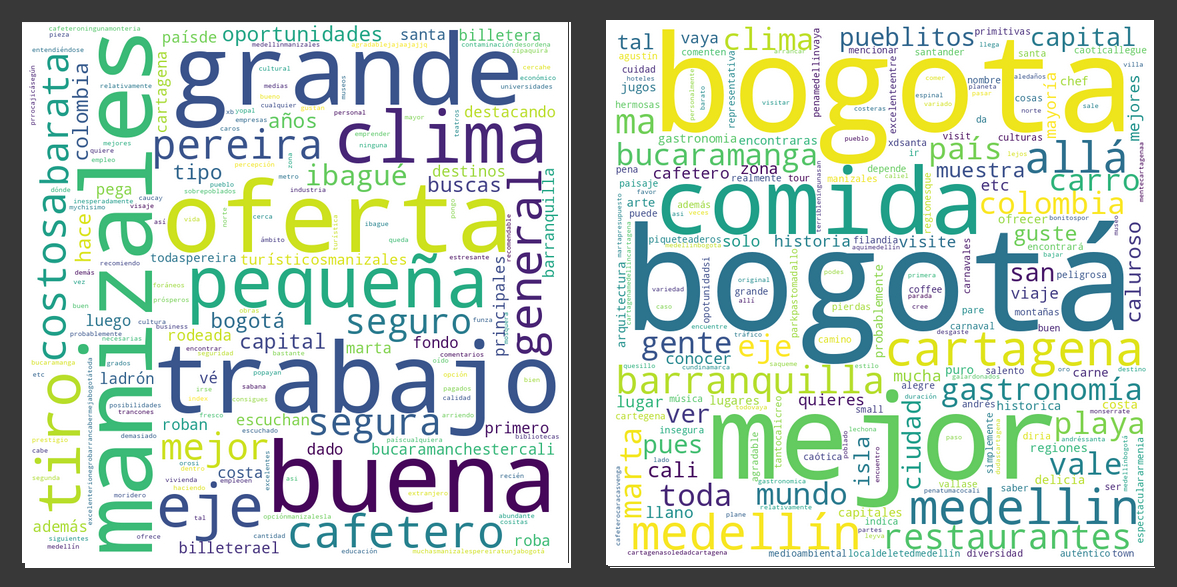

#4.   En ambos casos, al tratarse de Colombia se menciona mucho el tema de la seguridad. Para vivir, y para viajar, es un tema que se mencionó mucho en los post, pero puede que no se vea en las nubes porque se usaron muchas palabras distintas para tratarse.
#5.   Hay ciudades que aparecen mucho como opciones válidas en alguno de los dos post, pero en el otro no se tienen tan en cuenta. Tal es el caso de Manizales, que para vivir se menciona mucho, pero para viajar no tanto; y por el contrario, Bogotá se menciona mucho para viajar, pero no tanto para vivir.
#6.   Para ambos temas de conversación se mencionó los pros y contras de muchas de las ciudades. Medellin, que es la ciudad donde vivimos y la que tanto queremos fue mencionado por su belleza y cultura, pero también por su mala reputación.
